## Choix de la base de données

La base de données est disponible sur Kaggle, il s'agit d'une base données utiliséeen Data Analytics

In [2]:
import pandas as pd 
filename='entretien/archive/sales_data_sample.csv'
pdf = pd.read_csv(filename, sep=",", encoding='Latin-1')
pdf.head(5)
result = pdf.columns
print(result)

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')


In [4]:
df = pdf.drop(columns=['CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE', 'PRODUCTLINE', 'MSRP','ORDERNUMBER'])
df.head(5)
print(pdf['CUSTOMERNAME'].value_counts()) #predict the next purchase
result = df.columns
print(result)

Euro Shopping Channel           259
Mini Gifts Distributors Ltd.    180
Australian Collectors, Co.       55
La Rochelle Gifts                53
AV Stores, Co.                   51
                               ... 
Microscale Inc.                  10
Royale Belge                      8
Auto-Moto Classics Inc.           8
Atelier graphique                 7
Boards & Toys Co.                 3
Name: CUSTOMERNAME, Length: 92, dtype: int64
Index(['QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER', 'SALES', 'ORDERDATE',
       'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID', 'PRODUCTCODE'],
      dtype='object')


In [7]:
df_ = df.groupby(['PRODUCTCODE'])
df_.head(5)

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTCODE
0,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,S10_1678
1,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,S10_1678
2,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,S10_1678
3,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,S10_1678
4,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,S10_1678
...,...,...,...,...,...,...,...,...,...,...
2797,25,56.78,8,1419.50,2/11/2003 0:00,Shipped,1,2,2003,S72_3212
2798,50,43.68,2,2184.00,4/16/2003 0:00,Shipped,2,4,2003,S72_3212
2799,32,64.97,8,2079.04,6/12/2003 0:00,Shipped,2,6,2003,S72_3212
2800,39,44.23,5,1724.97,8/8/2003 0:00,Shipped,3,8,2003,S72_3212


In [5]:
df['PRODUCTCODE'].value_counts()

S18_3232    52
S10_1949    28
S24_1444    28
S10_4962    28
S24_2840    28
            ..
S18_1749    22
S24_2887    22
S24_3969    22
S18_4409    22
S18_4933    22
Name: PRODUCTCODE, Length: 109, dtype: int64

In [6]:
df['YEAR_ID'].value_counts()

2004    1345
2003    1000
2005     478
Name: YEAR_ID, dtype: int64

In [7]:
df['MONTH_ID'].value_counts()

11    597
10    317
5     252
1     229
2     224
3     212
8     191
12    180
4     178
9     171
7     141
6     131
Name: MONTH_ID, dtype: int64

on peut tracer différents graphes pour visualiser les données à notre disposition : 
-Quantité vendu par produit dans l'année 2005, ceci va nous permettre de voir le produit qui se vend le mieux
-Quantité vendu du produit séléctionnées qui se vend le mieux annuellement, mensuellement et trimestriellement de l'année 2005
-Quantité total vendu au fil des mois, années, et trimestres
-Prédiction des ventes du produit séléctionnée pour l'année 2006 par une régression linéaire

## Etude sur l'année 2005 

In [13]:
df_jan = df[df['YEAR_ID'] == 2005]
df_jan.head()
df_jan.groupby(['MONTH_ID'])
df_jan.head(20)


,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTCODE
22,21,34.91,12,733.11,2/3/2005 0:00,Shipped,1,2,2005,S10_1678
23,42,76.36,4,3207.12,3/3/2005 0:00,Shipped,1,3,2005,S10_1678
24,24,100.00,7,2434.56,4/8/2005 0:00,Shipped,2,4,2005,S10_1678
25,66,100.00,2,7516.08,5/13/2005 0:00,Disputed,2,5,2005,S10_1678
49,41,100.00,2,4514.92,1/20/2005 0:00,Shipped,1,1,2005,S10_1949
50,36,100.00,3,8254.80,2/17/2005 0:00,Shipped,1,2,2005,S10_1949
51,24,100.00,4,2416.56,3/9/2005 0:00,Shipped,1,3,2005,S10_1949
52,23,100.00,9,4140.23,5/1/2005 0:00,Shipped,2,5,2005,S10_1949
53,50,100.00,6,12001.00,5/31/2005 0:00,In Process,2,5,2005,S10_1949
76,39,100.00,5,5288.01,2/2/2005 0:00,Shipped,1,2,2005,S10_2016


98
22       S10_1678
49       S10_1949
76       S10_2016
101      S10_4698
128      S10_4757
          ...    
2713    S700_3505
2739    S700_3962
2765    S700_4002
2792     S72_1253
2819     S72_3212
Name: PRODUCTCODE, Length: 109, dtype: object
{'S10_1678': 13890.869999999999, 'S10_1949': 31327.51, 'S10_2016': 19234.660000000003, 'S10_4698': 30425.41, 'S10_4757': 24689.83, 'S10_4962': 20586.559999999998, 'S12_1099': 10774.19, 'S12_1108': 18343.04, 'S12_1666': 28088.3, 'S12_2823': 25791.999999999996, 'S12_3148': 18170.6, 'S12_3380': 10177.720000000001, 'S12_3891': 18680.469999999998, 'S12_3990': 9998.140000000001, 'S12_4473': 14524.29, 'S12_4675': 27375.29, 'S18_1097': 21478.39, 'S18_1129': 24721.5, 'S18_1342': 22177.71, 'S18_1367': 10768.66, 'S18_1589': 16459.54, 'S18_1662': 17976.72, 'S18_1749': 29469.760000000002, 'S18_1889': 17451.27, 'S18_1984': 21788.340000000004, 'S18_2238': 16833.22, 'S18_2248': 15555.720000000001, 'S18_2319': 17068.65, 'S18_2325': 17959.0, 'S18_2432': 9375.33

<BarContainer object of 10 artists>

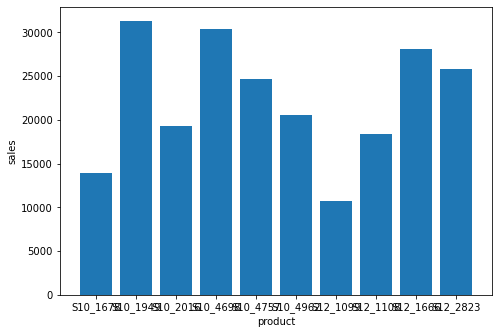

In [19]:
months = df_jan['MONTH_ID'].value_counts()
df_mask=df_jan['MONTH_ID']==1    
sales_jan = df_jan[df_mask]

count_products = sales_jan['PRODUCTCODE'].value_counts()
no_products = count_products.size
print(no_products)

#produits vendus au mois de janvier

products = df_jan['PRODUCTCODE'].drop_duplicates()
print(products)
#liste des produits vendus au mois de J
arr_products = products.values

sales_products = {};

for i in range(no_products): 
    mask = (df_jan['PRODUCTCODE']==arr_products[i])
    sales = df_jan[mask]['SALES'].values 
    total = sum(sales)
    sales_products[arr_products[i]] = total

import matplotlib.pyplot as plt
import numpy as np
firstpairs = {k: sales_products[k] for k in list(sales_products)[:10]}

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.xlabel("product")
plt.ylabel('sales')
ax.bar(firstpairs.keys(),firstpairs.values())

on va tracer l'histogramme des 20 différents produits, celui-ci sera en 2D : x : l'id du produit et y : le sales

cherchons le produit qui s'est le mieux vendu en Janvier 2005 et essayons de faire une prédiction sur la quantité de ses ventes 

In [21]:
produit = max(sales_products, key=sales_products.get)
print(produit)

S18_3232


on fera par la suite une prédiction sur ce produit

## Etude année - 2004

total des ventes selon les mois année 2004

In [29]:
Feature = df[df['YEAR_ID']==2004]
X = Feature

print(X['MONTH_ID'].value_counts())


11    301
10    159
8     133
12    110
9      95
1      91
7      91
2      86
6      85
5      74
4      64
3      56
Name: MONTH_ID, dtype: int64


,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTCODE
9,41,100.0,14,4708.44,1/15/2004 0:00,Shipped,1,1,2004,S10_1678
10,37,100.0,1,3965.66,2/20/2004 0:00,Shipped,1,2,2004,S10_1678
11,23,100.0,7,2333.12,4/5/2004 0:00,Shipped,2,4,2004,S10_1678
12,28,100.0,2,3188.64,5/18/2004 0:00,Shipped,2,5,2004,S10_1678
13,34,100.0,2,3676.76,6/28/2004 0:00,Shipped,2,6,2004,S10_1678


il faut calculer les ventes de chaque mois, pour l'année 2004 on ne dispose que des informations du mois

In [32]:
arr_months = {}
for i in range(12):
    intermediaire = X[X['MONTH_ID'] == i+1]
    arr = intermediaire['SALES'].tolist()
    print(len(arr))
    somme = sum(arr)
    arr_months[i] = somme

91
86
56
64
74
85
91
133
95
159
301
110
{0: 316577.4200000001, 1: 311419.5299999999, 2: 205733.72999999992, 3: 206148.12000000008, 4: 273438.3900000001, 5: 286674.22, 6: 327144.0899999998, 7: 461501.2700000001, 8: 320750.91000000003, 9: 552924.25, 10: 1089048.0100000005, 11: 372802.6599999999}


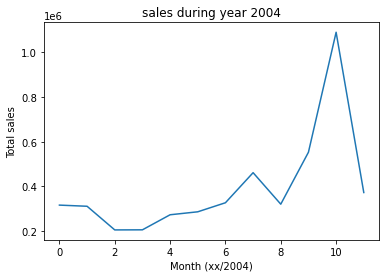

In [35]:

months = list(arr_months.keys())
value = list(arr_months.values())
fig = plt.figure()

plt.plot(months, value)
  
# naming the x axis
plt.xlabel('Month (xx/2004)')
# naming the y axis
plt.ylabel('Total sales')
  
# giving a title to my graph
plt.title('sales during year 2004')
  
# function to show the plot
plt.show()

In [ ]:
we can see that there is a peak in November, then the sales plummet

## Prédiction des ventes du produit S18_3232 pour le mois 01/2005

Quel sera la quantité vendu du produit S18_3232 pour le mois 01/2005: 
ne disponsant pas d'assez de features pour une regression linéaire multiple, on se contentera d'une regréssion linéaire simple, le features sera les ventes des mois précédent le 01/2005
on peut utiliser


In [115]:
df_S18_3232 = df[df['PRODUCTCODE'] == 'S18_3232']
df_S18_3232_2005 = df_S18_3232[df_S18_3232['YEAR_ID'] == 2005][['SALES','MONTH_ID']]
df_S18_3232_2003 = df_S18_3232[df_S18_3232['YEAR_ID'] == 2003][['SALES','MONTH_ID']]
df_S18_3232_2004 = df_S18_3232[df_S18_3232['YEAR_ID'] == 2004][['SALES','MONTH_ID']]

arr_2003 = {}
arr_2004 = {}
year_2005 = {}


for i in range(12): 
    somme = sum(df_S18_3232_2003[df_S18_3232_2003['MONTH_ID'] == i+1]['SALES'].tolist())
    somme1 = sum(df_S18_3232_2004[df_S18_3232_2004['MONTH_ID'] == i+1]['SALES'].tolist())
    somme2 = sum(df_S18_3232_2005[df_S18_3232_2005['MONTH_ID'] == i+1]['SALES'].tolist())
    arr_2003[i] = somme
    arr_2004[i+12] = somme1
    year_2005[i] = somme2


print(arr_2004)
print(list(arr_2004.values()))
df_S18_3232_2004.head(10)

{12: 5554.4, 13: 6407.86, 14: 4172.52, 15: 7083.37, 16: 7132.68, 17: 10431.29, 18: 8741.15, 19: 16444.99, 20: 2844.87, 21: 20969.079999999998, 22: 20934.57, 23: 10388.48}
[5554.4, 6407.86, 4172.52, 7083.37, 7132.68, 10431.29, 8741.15, 16444.99, 2844.87, 20969.079999999998, 20934.57, 10388.48]


,SALES,MONTH_ID
1032,5554.40,1
1033,6407.86,2
1034,4172.52,3
1035,7083.37,4
1036,7132.68,5
1037,6773.60,6
1038,3657.69,6
1039,4812.55,7
1040,3928.60,7
1041,6401.22,8


On peut tracer l'évolution du produit

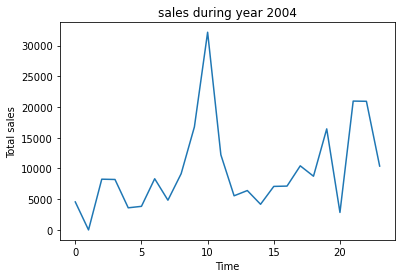

In [81]:
time =list(arr_2003.keys())+ list(arr_2004.keys())
sales =list(arr_2003.values())+list(arr_2004.values())

fig1 = plt.figure()

plt.plot(time, sales)
  
# naming the x axis
plt.xlabel('Time')
# naming the y axis
plt.ylabel('Total sales')
  
# giving a title to my graph
plt.title('sales during year 2004')
  
# function to show the plot
plt.show()

Modèle : regression linère

In [96]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
x = list(arr_2003.keys())+ list(arr_2004.keys())
x = np.asanyarray(x).reshape(-1,1)
y = list(arr_2003.values())+ list(arr_2004.values())
y= np.asanyarray(y)
regr.fit(x,y)
print(x)

[[ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]
 [18]
 [19]
 [20]
 [21]
 [22]
 [23]]


[14400.03322464 14775.19841594 15150.36360725 15525.52879855
 15900.69398986 16275.85918116 16651.02437246 17026.18956377
 17401.35475507 17776.51994638 18151.68513768 18902.01552029]


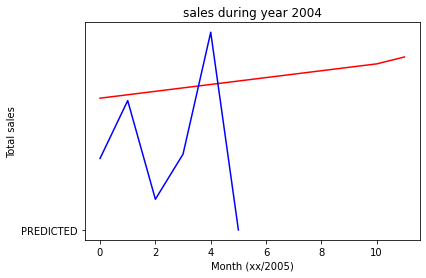

In [120]:
y_pred = regr.predict([[24], [25], [26], [27], [28], [29], [30], [31],[32], [33],[34],[36]])
print(y_pred)
y = list(year_2005.values())
fig = plt.figure()

plt.plot(months, y_pred, 'r')
plt.plot(months[:
               6], y[:6], 'b') 
  
# naming the x axis
plt.xlabel('Month (xx/2005)')
# naming the y axis
plt.ylabel('Total sales')
  
# giving a title to my graph
plt.title('sales during year 2004')
  
# function to show the plot
plt.show()

En bleu, les ventes réelles du produit S18_3232 en 2005 et en rouge les prédictions
Nous ne disposons pas des ventes réelles au dela du mois 05, selon les prédictions, celles-ci vont augmenter
Cependant, le modèle n'est pas très performant, nous disposant de peu de features et de donnée pour prédire les ventes correctement 